# Calculating Energy Surfaces [Legacy Method]

**Note**: Since pycalphad 0.11, we recommend using the Computable Property API for calculating energy surfaces. This method remains supported, but is not recommended for new users.

It is very common in CALPHAD modeling to directly examine the Gibbs energy surface of all the constituent phases in a system.

Below we show how the Gibbs energy of all phases may be calculated as a function of composition at a given temperature (2800 K).

Note that the chi phase has additional, internal degrees of freedom which allow it to take on multiple states for a given
overall composition. Only the low-energy states are relevant to calculating the equilibrium phase diagram.

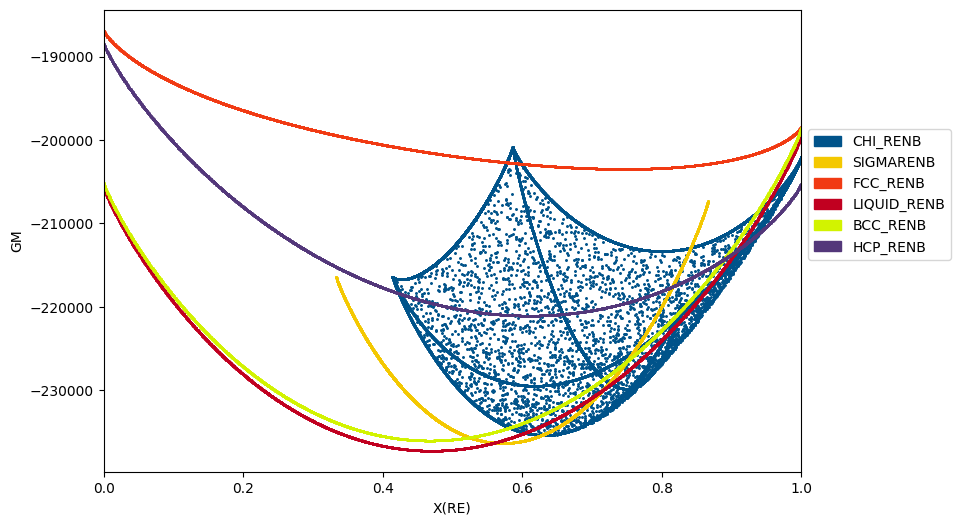

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, calculate, variables as v
from pycalphad.plot.utils import phase_legend
import numpy as np

# Load database and choose the phases that will be plotted
db_nbre = Database('nbre_liu.tdb')
my_phases_nbre = ['CHI_RENB', 'SIGMARENB', 'FCC_RENB', 'LIQUID_RENB', 'BCC_RENB', 'HCP_RENB']

# Get the colors that map phase names to colors in the legend
legend_handles, color_dict = phase_legend(my_phases_nbre)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

# Loop over phases, calculate the Gibbs energy, and scatter plot GM vs. X(RE)
for phase_name in my_phases_nbre:
    result = calculate(db_nbre, ['NB', 'RE'], phase_name, P=101325, T=2800, output='GM')
    ax.scatter(result.X.sel(component='RE'), result.GM, marker='.', s=5, color=color_dict[phase_name])

# Format the plot
ax.set_xlabel('X(RE)')
ax.set_ylabel('GM')
ax.set_xlim((0, 1))
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))
plt.show()

## Triangular projection plots

Importing the `pycalphad.plot.triangular` module automatically registers a `'triangular'` projection in matplotlib for you to use in custom plots, such as liquidus projections or contour plots of custom property models.

Here we will use pycalphad to calculate the mixing enthalpy of the FCC phase in our Al-Cu-Y system. Then we will the triangular projection to plot the calculated points as a colored scatterplot on the triangular axes.

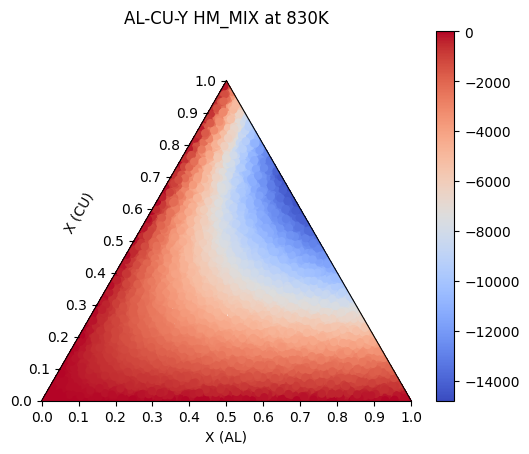

In [2]:
import matplotlib.pyplot as plt
from pycalphad.plot import triangular
from pycalphad import calculate

db_al_cu_y = Database('Al-Cu-Y.tdb')
comps = ['AL', 'CU', 'Y', 'VA']

# some sample data, these could be from an equilibrium calculation or a property model.
# here we are calculating the mixing enthlapy of the FCC_A1 phase at 830K. 
c = calculate(db_al_cu_y, comps, 'FCC_A1', output='HM_MIX', T=830, P=101325, pdens=5000)

# Here we are getting the values from our plot. 
xs = c.X.values[0, 0, 0, :, 0]  # 1D array of Al compositions
ys = c.X.values[0, 0, 0, :, 1]  # 1D array of Cu compositions
zs = c.HM_MIX.values[0, 0, 0, :]  # 1D array of mixing enthalpies at these compositions

# when we imported the pycalphad.plot.triangular module, it made the 'triangular' projection available for us to use.
fig = plt.figure()
ax = fig.add_subplot(projection='triangular')
ax.scatter(xs, ys, c=zs, 
           cmap='coolwarm', 
           linewidth=0.0)

# label the figure
ax.set_xlabel('X (AL)')
ax.set_ylabel('X (CU)')
ax.yaxis.label.set_rotation(60)  # rotate ylabel
ax.yaxis.set_label_coords(x=0.12, y=0.5)  # move the label to a pleasing position
ax.set_title('AL-CU-Y HM_MIX at 830K')

# set up the colorbar
cm = plt.cm.ScalarMappable(cmap='coolwarm')
cm.set_array(zs)
fig.colorbar(cm, ax=ax);